In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy import units as u
from astropy.io import ascii
import pandas as pd
import matplotlib
from scipy.interpolate import interp1d
import scipy

%matplotlib inline

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

import pyCloudy as pc
pc.log_.level = 3

In [2]:
nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]

nu_range = np.logspace(2,13,1000)

In [3]:
def specific_intensity(nu):
    
    J0 = 3e-23
    alpha = 1
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

# photoionization cross-section for hydrogen in the ground state by photons above 13.6 eV
# from https://ned.ipac.caltech.edu/level5/Madau6/Madau1_2.html

def H_cross_section(nu): 
    
    sigma_L = 6.3e-18 # [cm^2]
    
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    sigma_H = sigma_L*np.power(nu/nu0,-3)
    
    return sigma_H

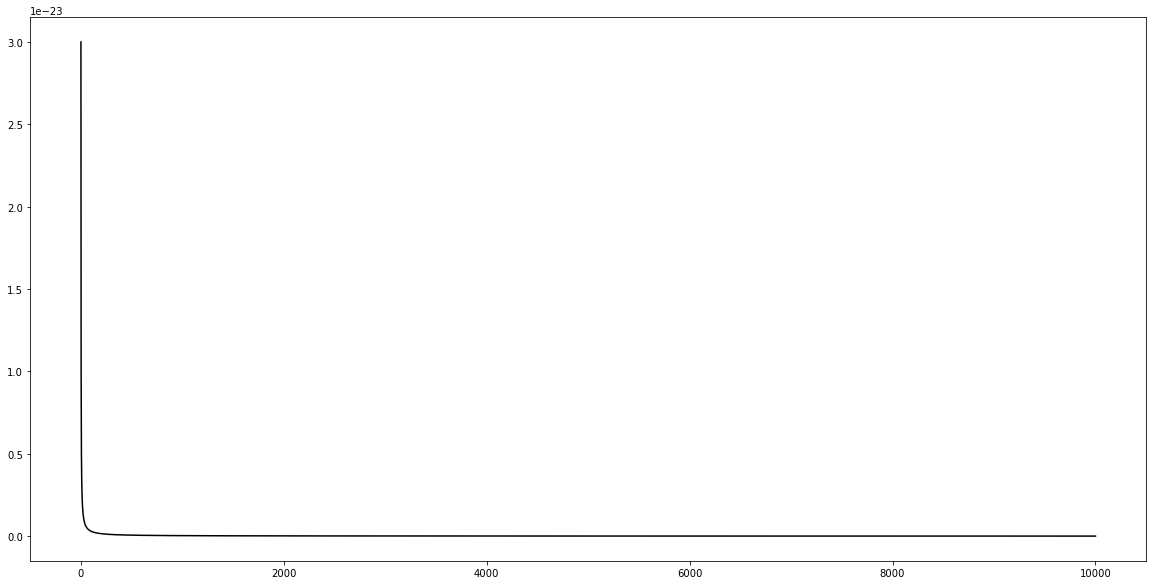

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

factor = 10000

x = np.linspace(nu0,factor*nu0,factor)

ax.plot(np.linspace(nu0/nu0,factor,factor), specific_intensity(x),color='black')

ax.set_xscale('linear')
ax.set_yscale('linear')

In [5]:
# calculate the hydrogen UVB photoionization rate, Γ

def integrand(nu):
    
    h = 6.626e-27 # [erg s]
    
    return (4*np.pi*H_cross_section(nu)*specific_intensity(nu))/(h*nu)

In [6]:
upper_limit_factor = []
gamma_HI = []

for factor in range(2,1000,1):
    
    a = nu0
    b = factor*nu0

    result, error = scipy.integrate.quad(integrand, a, b)
    
    upper_limit_factor.append(factor)
    gamma_HI.append(result)

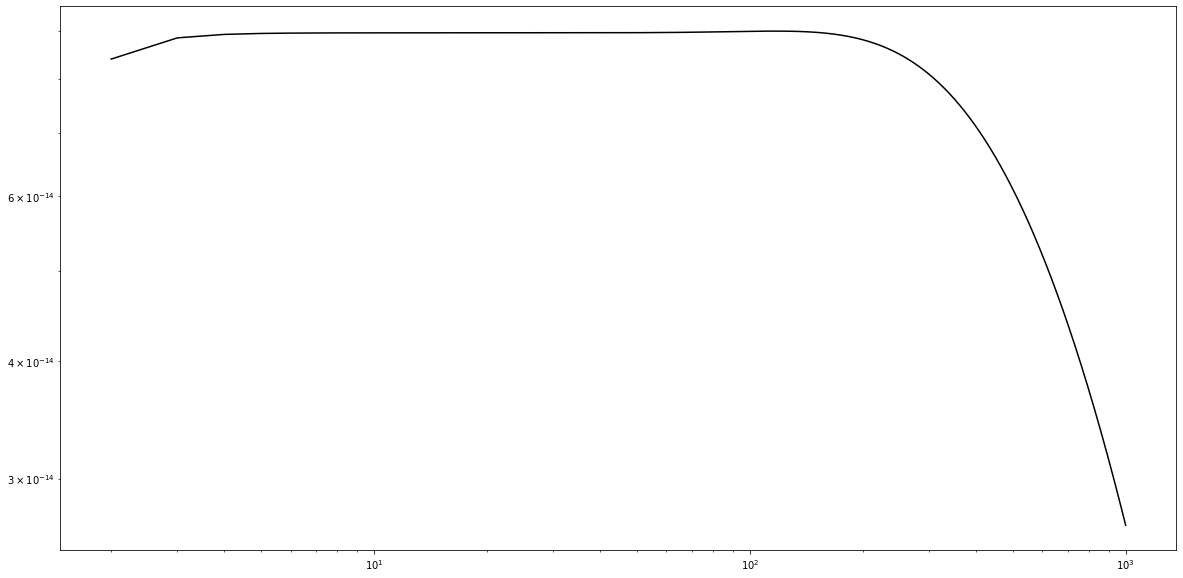

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

ax.plot(upper_limit_factor,gamma_HI,color='black')

ax.set_xscale('log')
ax.set_yscale('log')

In [8]:
def specific_intensity(nu):
    
    J0 = J0_factor*1e-23
    alpha = 1
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

# photoionization cross-section for hydrogen in the ground state by photons above 13.6 eV
# from https://ned.ipac.caltech.edu/level5/Madau6/Madau1_2.html

def H_cross_section(nu): 
    
    sigma_L = 6.3e-18 # [cm^2]
    
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    sigma_H = sigma_L*np.power(nu/nu0,-3)
    
    return sigma_H

In [9]:
J0_scaling = []
gamma_HI = []

for i in np.arange(0.10,10,0.10):
    
    J0_factor = i # global variable
    
    a = nu0
    b = 100*nu0

    result, error = scipy.integrate.quad(integrand, a, b)
    
    J0_scaling.append(J0_factor)
    gamma_HI.append(result)

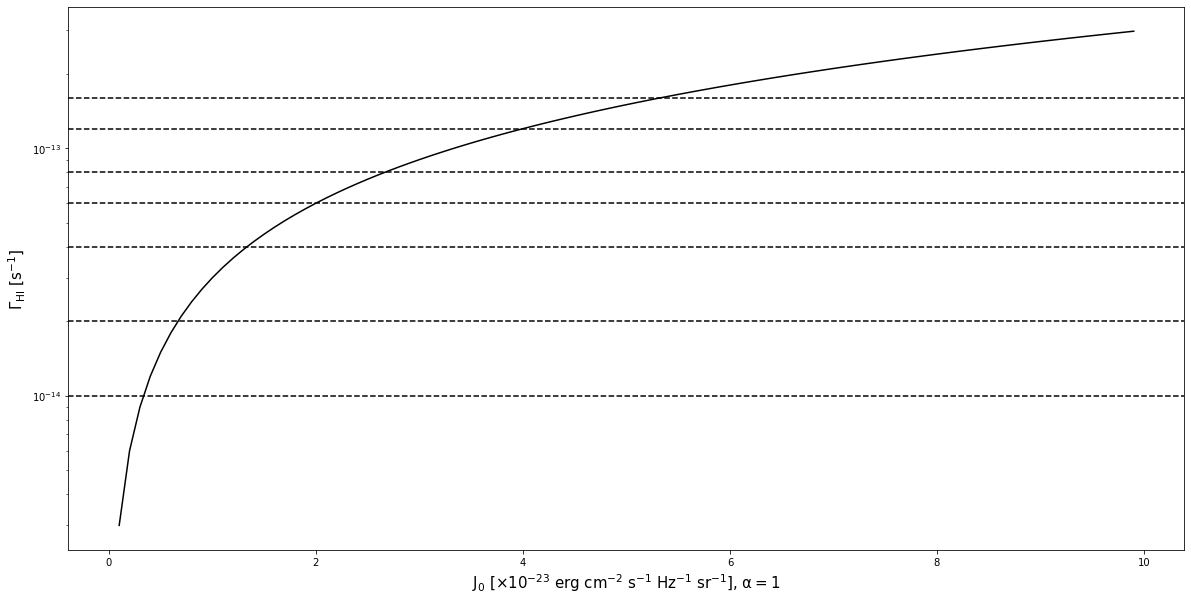

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

ax.plot(J0_scaling,gamma_HI,color='black')

gamma_HI_Fumagalli = np.array([1,2,4,6,8,12,16])*1e-14

for i in range(len(gamma_HI_Fumagalli)):
    
    ax.axhline(gamma_HI_Fumagalli[i],color='black',ls='--')


ax.set_xlabel(r'J$_0$ [$\times 10^{-23}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$], $\alpha = 1$',fontsize=15)
ax.set_ylabel(r'$\Gamma_{\mathrm{HI}}$ [$s^{-1}$]',fontsize=15)

ax.set_xscale('linear')
ax.set_yscale('log')

In [11]:
def specific_intensity(nu):
    
    J0 = 1e-23
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

# photoionization cross-section for hydrogen in the ground state by photons above 13.6 eV
# from https://ned.ipac.caltech.edu/level5/Madau6/Madau1_2.html

def H_cross_section(nu): 
    
    sigma_L = 6.3e-18 # [cm^2]
    
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    sigma_H = sigma_L*np.power(nu/nu0,-3)
    
    return sigma_H

In [12]:
alpha_scaling = []
gamma_HI = []

for i in np.arange(0.10,10,0.10):
    
    alpha = i # global variable
    
    a = nu0
    b = 100*nu0

    result, error = scipy.integrate.quad(integrand, a, b)
    
    alpha_scaling.append(J0_factor)
    gamma_HI.append(result)

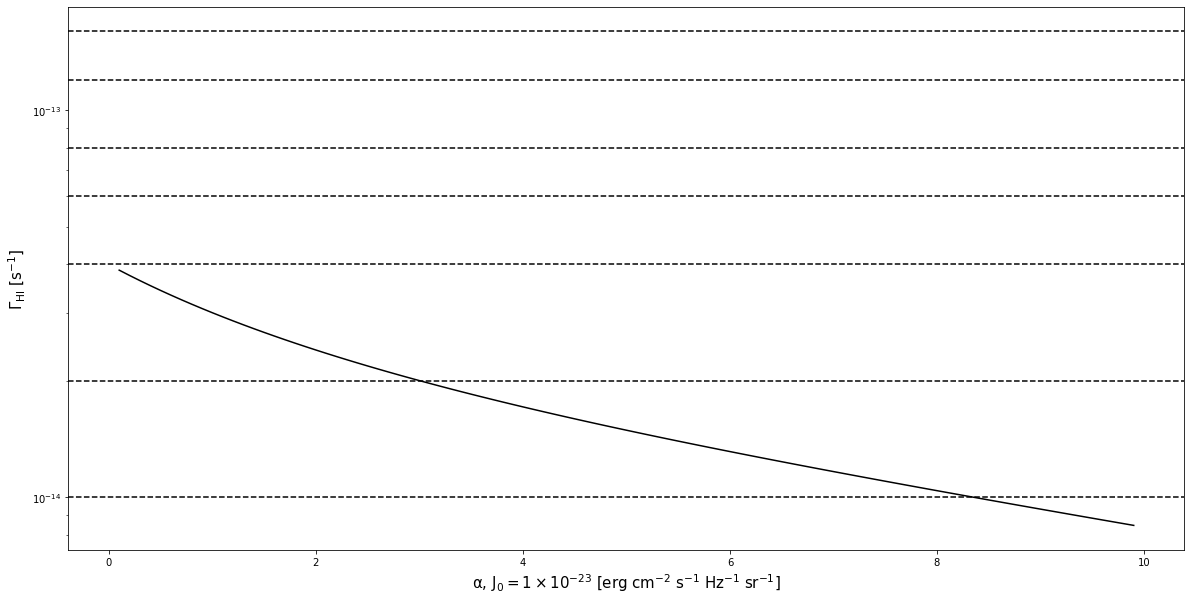

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

ax.plot(J0_scaling,gamma_HI,color='black')

gamma_HI_Fumagalli = np.array([1,2,4,6,8,12,16])*1e-14

for i in range(len(gamma_HI_Fumagalli)):
    
    ax.axhline(gamma_HI_Fumagalli[i],color='black',ls='--')

ax.set_xlabel(r'$\alpha$, J$_0 = 1 \times 10^{-23}$ [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)
ax.set_ylabel(r'$\Gamma_{\mathrm{HI}}$ [$s^{-1}$]',fontsize=15)

ax.set_xscale('linear')
ax.set_yscale('log')

In [14]:
def specific_intensity(nu):
    
    J0 = J0_factor*1e-23
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

# photoionization cross-section for hydrogen in the ground state by photons above 13.6 eV
# from https://ned.ipac.caltech.edu/level5/Madau6/Madau1_2.html

def H_cross_section(nu): 
    
    sigma_L = 6.3e-18 # [cm^2]
    
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    sigma_H = sigma_L*np.power(nu/nu0,-3)
    
    return sigma_H

In [15]:
J0_scaling = np.zeros((100,100))
alpha_scaling = np.zeros((100,100))
gamma_HI = np.zeros((100,100))

for i, value1 in enumerate(np.arange(0.10,10.10,0.10)):

    J0_factor = value1

    for j, value2 in enumerate(np.arange(0.10,10.10,0.10)):

        alpha = value2 

        a = nu0
        b = 100*nu0

        result, error = scipy.integrate.quad(integrand, a, b)

        J0_scaling[i][j] = J0_factor
        alpha_scaling[i][j] = alpha
        gamma_HI[i][j] = result

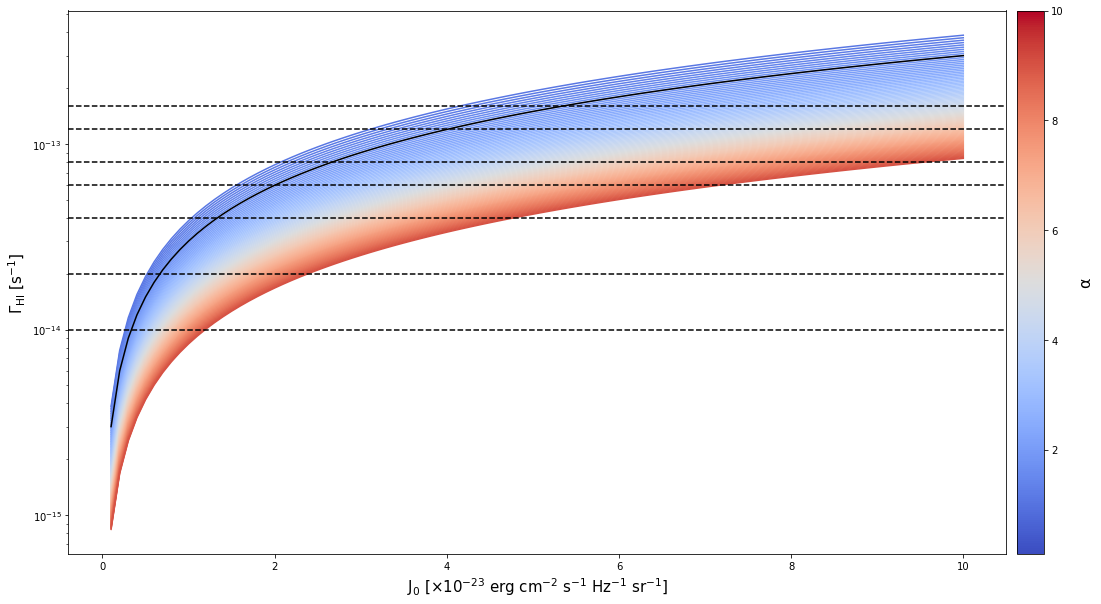

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

num_segments = 100
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

for j in range(100):
    
    ax.plot(J0_scaling[:,j],gamma_HI[:,j],color=cmap[j])
    
ax.plot(J0_scaling[:,9],gamma_HI[:,9],color='black')

gamma_HI_Fumagalli = np.array([1,2,4,6,8,12,16])*1e-14

for i in range(len(gamma_HI_Fumagalli)):
    
    ax.axhline(gamma_HI_Fumagalli[i],color='black',ls='--')

ax.set_xlabel(r'J$_0$ [$\times 10^{-23}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)
ax.set_ylabel(r'$\Gamma_{\mathrm{HI}}$ [$s^{-1}$]',fontsize=15)

ax.set_xscale('linear')
ax.set_yscale('log')

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min(alpha_scaling[0,:]), vmax=max(alpha_scaling[0,:])))
sm.set_array([]) 

cbar = plt.colorbar(sm, pad = 0.01)
cbar.set_label(r'$\alpha$', fontsize=16, labelpad = 15)

In [17]:
# HM 2012 https://www.ucolick.org/~pmadau/CUBA/DOWNLOADS.html

file_path = 'HM12.txt'  

def skip_header_lines(file_path, num_lines_to_skip):
    with open(file_path, 'r') as f:
        for _ in range(num_lines_to_skip):
            next(f) 

skip_header_lines(file_path, 100)

df = pd.read_csv(file_path, delim_whitespace=True, header=None,skiprows=21)

In [18]:
# FG 2011 Update https://galaxies.northwestern.edu/uvb-fg09/

file_path = 'fg_uvb_dec11_z_0.0.dat'  

df_FG11 = pd.read_csv(file_path, delim_whitespace=True, header=None,skiprows=2)

In [19]:
# FG 2020 https://galaxies.northwestern.edu/uvb/

file_path = 'fg20_spec_nu.dat'  

df_FG20 = pd.read_csv(file_path, delim_whitespace=True, header=None,skiprows=1)

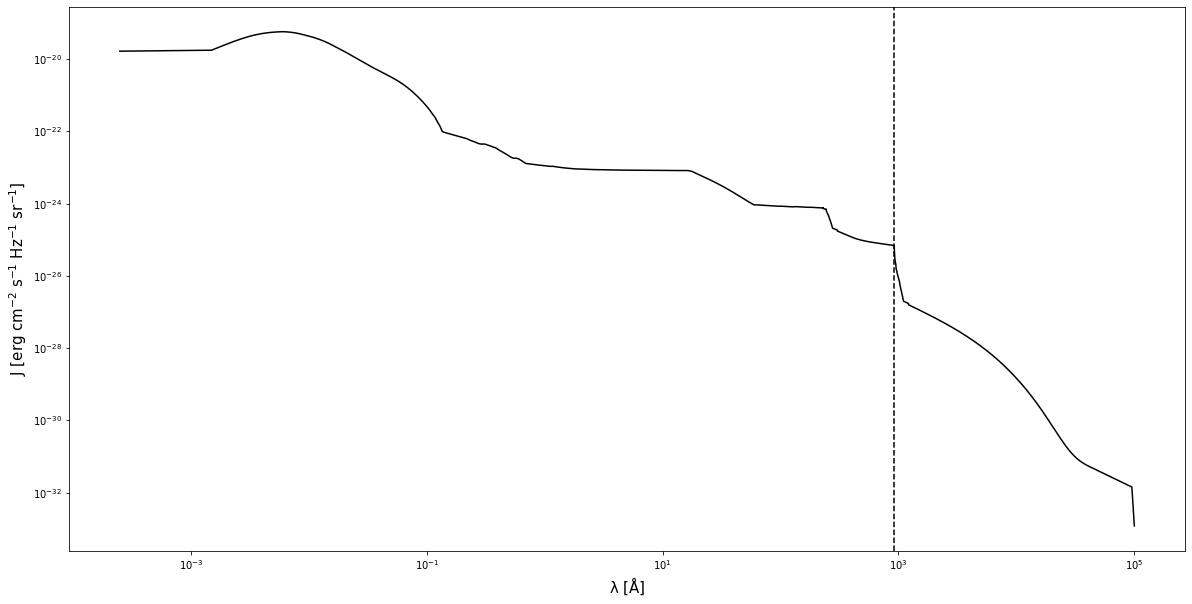

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

num_segments = 100
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

ax.plot(df.iloc[:,0][::-1],df.iloc[:,1],color='black',ls='-')

ax.set_xscale('log')
ax.set_yscale('log')

ax.axvline(912,color='black',ls='--')

ax.set_xlabel(r'$\lambda$ [$\AA$]',fontsize=15)
ax.set_ylabel(r'J [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)

plt.show()

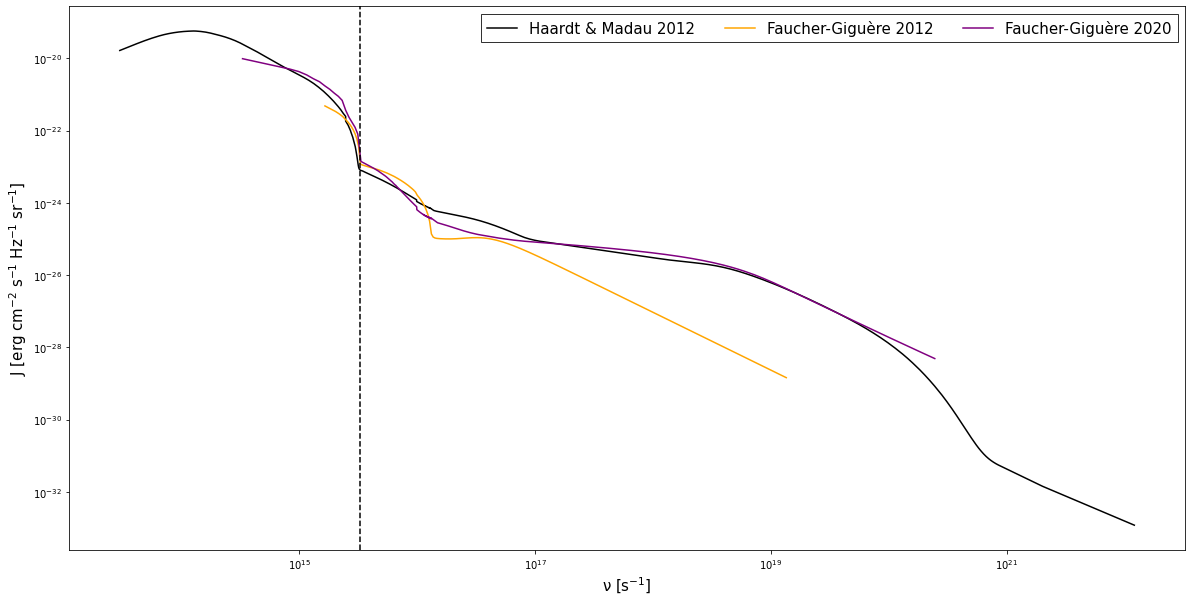

In [21]:
def angstrom_to_hertz(wavelength_angstrom):

    c = 299792458.0  # m/s

    wavelength_meters = wavelength_angstrom * 1e-10  # 1 Angstrom = 1e-10 m

    frequency_hertz = c / wavelength_meters

    return frequency_hertz

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

num_segments = 100
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

ax.plot(angstrom_to_hertz(df.iloc[:,0]),df.iloc[:,1],color='black',ls='-',label='Haardt & Madau 2012')
ax.plot(3.2898e15*df_FG11.iloc[:,0],df_FG11.iloc[:,1]*1e-21,color='orange',ls='-',label='Faucher-Giguère 2012')
ax.plot(3.2898e15*df_FG20.iloc[:,0],df_FG20.iloc[:,1]*1e-21,color='purple',ls='-',label='Faucher-Giguère 2020')

ax.set_xscale('log')
ax.set_yscale('log')

ax.axvline(nu0,color='black',ls='--')

ax.set_xlabel(r'$\nu$ [s$^{-1}$]',fontsize=15)
ax.set_ylabel(r'J [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)

ax.legend(loc='upper right',fontsize=15,ncol=4, fancybox=False,edgecolor='black')

plt.show()

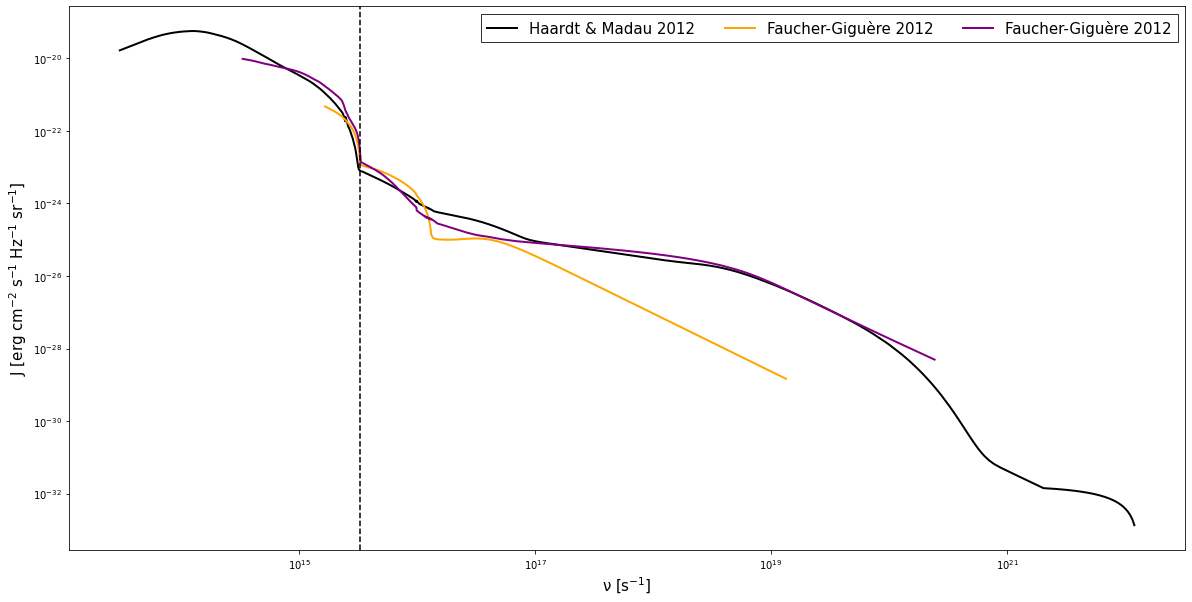

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

x = angstrom_to_hertz(df.iloc[:,0])
y = df.iloc[:,1]
interp_linear_HM12 = interp1d(x, y, kind='linear')
x_new = np.logspace(np.log10(1.01*np.min(angstrom_to_hertz(df.iloc[:,0]))),np.log10(.99*np.max(angstrom_to_hertz(df.iloc[:,0]))),10000)
y_new = interp_linear_HM12(x_new)
ax.plot(x_new,y_new,color='black',ls='-',lw=2,label='Haardt & Madau 2012')

x = 3.2898e15*df_FG11.iloc[:,0]
y = 1e-21*df_FG11.iloc[:,1]
interp_linear_FG11 = interp1d(x, y, kind='linear')
x_new = np.logspace(np.log10(1.01*np.min(x)),np.log10(.99*np.max(x)),10000)
y_new = interp_linear_FG11(x_new)
ax.plot(x_new,y_new,color='orange',ls='-',lw=2,label='Faucher-Giguère 2012')

x = 3.2898e15*df_FG20.iloc[:,0]
y = 1e-21*df_FG20.iloc[:,1]
interp_linear_FG20 = interp1d(x, y, kind='linear')
x_new = np.logspace(np.log10(1.01*np.min(x)),np.log10(.99*np.max(x)),10000)
y_new = interp_linear_FG20(x_new)
ax.plot(x_new,y_new,color='purple',ls='-',lw=2,label='Faucher-Giguère 2012')

ax.set_xscale('log')
ax.set_yscale('log')

ax.axvline(nu0,color='black',ls='--')

ax.set_xlabel(r'$\nu$ [s$^{-1}$]',fontsize=15)
ax.set_ylabel(r'J [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)

ax.legend(loc='upper right',fontsize=15,ncol=4, fancybox=False,edgecolor='black')

plt.show()

In [23]:
# calculate the hydrogen UVB photoionization rate, Γ

def integrand(nu):
    
    h = 6.626e-27 # [erg s]
    
    return (4*np.pi*H_cross_section(nu)*function(nu))/(h*nu)

lower_index = np.argmin(np.abs(angstrom_to_hertz(df.iloc[:,0])-nu0)) # array index at Lyman limit
upper_index = -1

a = nu0
b = 100*nu0

function = interp_linear_HM12
gamma_HM12, error = scipy.integrate.quad(integrand, a, b)

function = interp_linear_FG11
gamma_FG11, error = scipy.integrate.quad(integrand, a, b)

function = interp_linear_FG20
gamma_FG20, error = scipy.integrate.quad(integrand, a, b)

In [24]:
def specific_intensity(nu):
    
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

def integrand(nu):
    
    h = 6.626e-27 # [erg s]
    
    return (4*np.pi*H_cross_section(nu)*specific_intensity(nu))/(h*nu)

a = nu0
b = 100*nu0

alpha = 1
J0 = 2.86e-23
gamma_BH17a, error = scipy.integrate.quad(integrand, a, b)

alpha = 1
J0 = 4.0e-23
gamma_BH17b, error = scipy.integrate.quad(integrand, a, b)

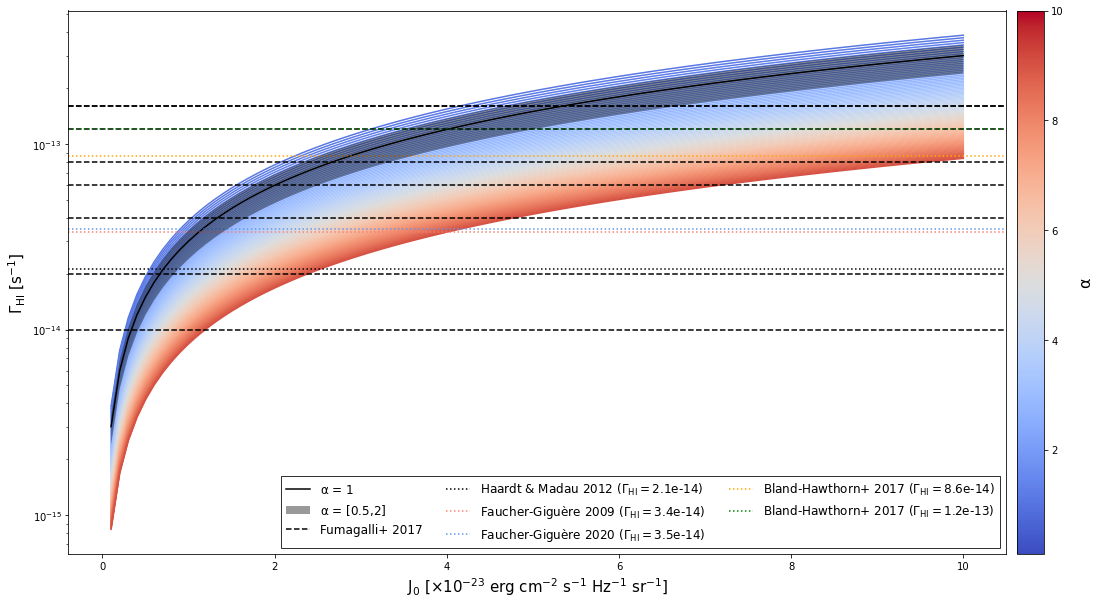

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

num_segments = 100
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

for j in range(100):
    
    ax.plot(J0_scaling[:,j],gamma_HI[:,j],color=cmap[j])
    
ax.plot(J0_scaling[:,9],gamma_HI[:,9],color='black',label=r'$\alpha$ = 1')
#J0 = 2.86
#ax.axvline(J0)
#J0 = 4
#ax.axvline(J0)
ax.fill_between(J0_scaling[:,9],gamma_HI[:,4],gamma_HI[:,19],color='black',label=r'$\alpha$ = [0.5,2]',edgecolor='None',zorder=20,alpha=0.4)

gamma_HI_Fumagalli = np.array([1,2,4,6,8,12,16])*1e-14

ax.axhline(gamma_HI_Fumagalli[i],color='black',ls='--',label='Fumagalli+ 2017')
for i in range(len(gamma_HI_Fumagalli)):
    
    ax.axhline(gamma_HI_Fumagalli[i],color='black',ls='--')
    
ax.axhline(gamma_HM12,color='black',ls=':',label=r'Haardt & Madau 2012 ($\Gamma_{\mathrm{HI}} = $%.2g)'%gamma_HM12)
ax.axhline(gamma_FG11,color='salmon',ls=':',label=r'Faucher-Giguère 2009 ($\Gamma_{\mathrm{HI}} = $%.2g)'%gamma_FG11)
ax.axhline(gamma_FG20,color='cornflowerblue',ls=':',label=r'Faucher-Giguère 2020 ($\Gamma_{\mathrm{HI}} = $%.2g)'%gamma_FG20)

ax.axhline(gamma_BH17a,color='orange',ls=':',label=r'Bland-Hawthorn+ 2017 ($\Gamma_{\mathrm{HI}} = $%.2g)'%gamma_BH17a)
ax.axhline(gamma_BH17b,color='green',ls=':',label=r'Bland-Hawthorn+ 2017 ($\Gamma_{\mathrm{HI}} = $%.2g)'%gamma_BH17b)

ax.set_xlabel(r'J$_0$ [$\times 10^{-23}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)
ax.set_ylabel(r'$\Gamma_{\mathrm{HI}}$ [$s^{-1}$]',fontsize=15)

ax.set_xscale('linear')
ax.set_yscale('log')

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min(alpha_scaling[0,:]), vmax=max(alpha_scaling[0,:])))
sm.set_array([]) 

cbar = plt.colorbar(sm, pad = 0.01)
cbar.set_label(r'$\alpha$', fontsize=16, labelpad = 15)

ax.legend(loc='lower right', fontsize=12
          , ncol=3, fancybox=False,edgecolor='black')

plt.savefig('photoioization_rate_comparison.pdf')
plt.show()

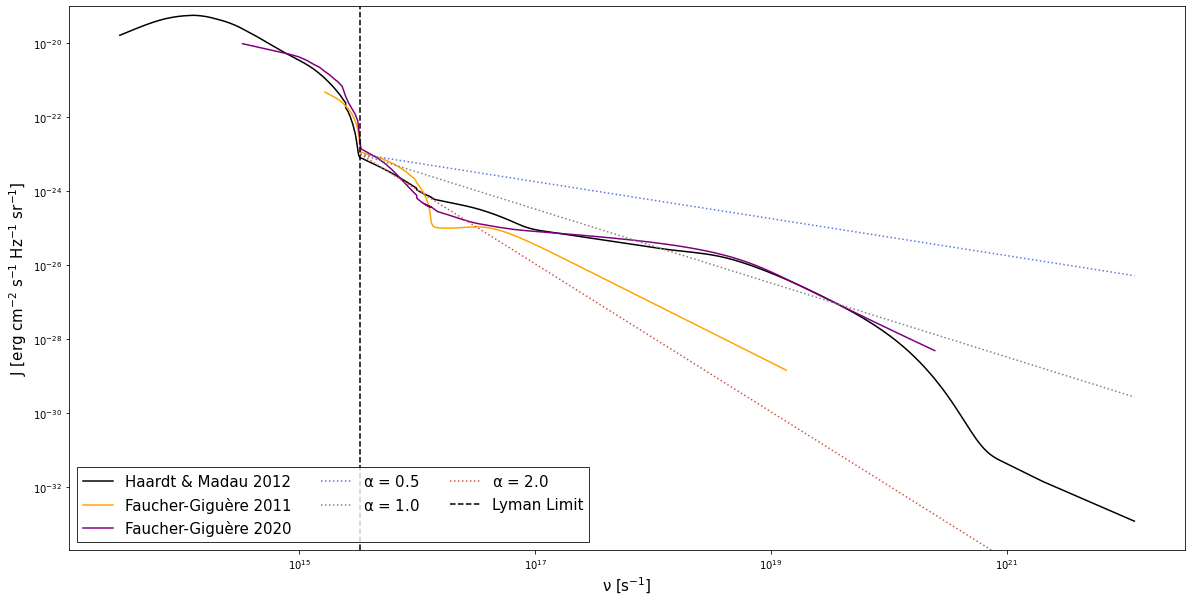

In [28]:
def angstrom_to_hertz(wavelength_angstrom):

    c = 299792458.0  # m/s

    wavelength_meters = wavelength_angstrom * 1e-10  # 1 Angstrom = 1e-10 m

    frequency_hertz = c / wavelength_meters

    return frequency_hertz

def specific_intensity(nu):
    
    J0 = 1e-23
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

num_segments = 100
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

ax.plot(angstrom_to_hertz(df.iloc[:,0]),df.iloc[:,1],color='black',ls='-',label='Haardt & Madau 2012')
ax.plot(3.2898e15*df_FG11.iloc[:,0],df_FG11.iloc[:,1]*1e-21,color='orange',ls='-',label='Faucher-Giguère 2011')
ax.plot(3.2898e15*df_FG20.iloc[:,0],df_FG20.iloc[:,1]*1e-21,color='purple',ls='-',label='Faucher-Giguère 2020')

x = np.logspace(np.log10(nu0),np.log10(np.max(angstrom_to_hertz(df.iloc[:,0]))))
num_segments = 3
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

alpha = 0.5
ax.plot(x,specific_intensity(x),ls=':',color=cmap[0],label=r'$\alpha$ = 0.5')

alpha = 1
ax.plot(x,specific_intensity(x),ls=':',color='grey',label=r'$\alpha$ = 1.0')

alpha = 2
ax.plot(x,specific_intensity(x),ls=':',color=cmap[2],label=r'$\alpha$ = 2.0')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(2e-34,1e-19)

ax.axvline(nu0,color='black',ls='--',label='Lyman Limit')

ax.set_xlabel(r'$\nu$ [s$^{-1}$]',fontsize=15)
ax.set_ylabel(r'J [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)

ax.legend(loc='lower left',fontsize=15,ncol=3, fancybox=False,edgecolor='black')

plt.show()

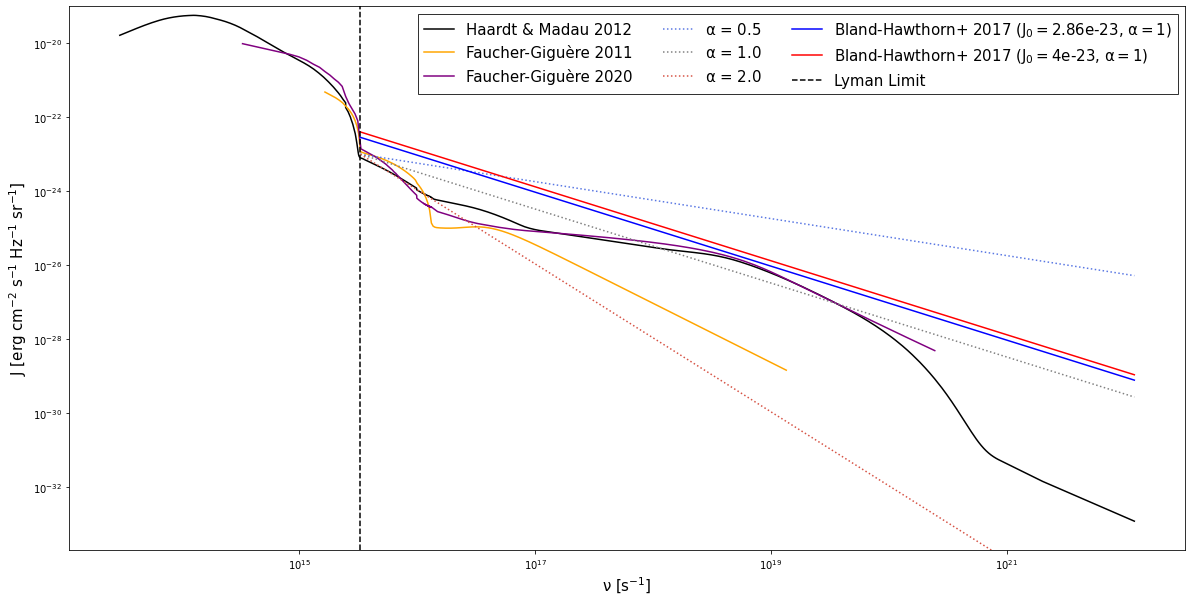

In [30]:
def angstrom_to_hertz(wavelength_angstrom):

    c = 299792458.0  # m/s

    wavelength_meters = wavelength_angstrom * 1e-10  # 1 Angstrom = 1e-10 m

    frequency_hertz = c / wavelength_meters

    return frequency_hertz

def specific_intensity(nu):
    
    J0 = 1e-23
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.0)

num_segments = 100
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

ax.plot(angstrom_to_hertz(df.iloc[:,0]),df.iloc[:,1],color='black',ls='-',label='Haardt & Madau 2012')
ax.plot(3.2898e15*df_FG11.iloc[:,0],df_FG11.iloc[:,1]*1e-21,color='orange',ls='-',label='Faucher-Giguère 2011')
ax.plot(3.2898e15*df_FG20.iloc[:,0],df_FG20.iloc[:,1]*1e-21,color='purple',ls='-',label='Faucher-Giguère 2020')

x = np.logspace(np.log10(nu0),np.log10(np.max(angstrom_to_hertz(df.iloc[:,0]))))
num_segments = 3
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, num_segments))

alpha = 0.5
ax.plot(x,specific_intensity(x),ls=':',color=cmap[0],label=r'$\alpha$ = 0.5')

alpha = 1
ax.plot(x,specific_intensity(x),ls=':',color='grey',label=r'$\alpha$ = 1.0')

alpha = 2
ax.plot(x,specific_intensity(x),ls=':',color=cmap[2],label=r'$\alpha$ = 2.0')

def specific_intensity(nu):
    
    nu0 = 3287198004385960 # frequency at the Lyman limit [1/s]
    
    J_nu = J0*np.power((nu/nu0),-1*alpha)
    
    return J_nu

alpha = 1
J0 = 2.86e-23
ax.plot(x,specific_intensity(x),ls='-',color='blue',label=r'Bland-Hawthorn+ 2017 (J$_0 = $%.3g, $\alpha = 1$)'%J0)

alpha = 1
J0 = 4.0e-23
ax.plot(x,specific_intensity(x),ls='-',color='red',label=r'Bland-Hawthorn+ 2017 (J$_0 = $%.3g, $\alpha = 1$)'%J0)

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_xlim(2.5e15,4e16)
#ax.set_ylim(5e-25,5e-22)

ax.set_ylim(2e-34,1e-19)


ax.axvline(nu0,color='black',ls='--',label='Lyman Limit')

ax.set_xlabel(r'$\nu$ [s$^{-1}$]',fontsize=15)
ax.set_ylabel(r'J [erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$ sr$^{-1}$]',fontsize=15)

ax.legend(loc='upper right',fontsize=15,ncol=3, fancybox=False,edgecolor='black')

plt.savefig('radiation_field.pdf')

plt.show()

In [2]:
import numpy as np

In [13]:
np.log10(1e-23*4*np.pi)

-21.900790135977903

In [21]:
import math

def size_in_kpc(distance_pc, angular_size_arcmin):
    # Convert angular size from arcminutes to radians
    angular_size_rad = angular_size_arcmin / (60.0 * 180.0) * math.pi
    
    # Calculate size in kpc
    size_kpc = (distance_pc * angular_size_rad) / (1000)
    
    return size_kpc

# Example usage
distance_pc = 7.3e6  # distance to the object in parsecs
angular_size_arcmin = 20#4.67  # angular size of the object in arcminutes

size = size_in_kpc(distance_pc, angular_size_arcmin)
print("Size of the object:", size, "kpc")

Size of the object: 42.46967846519535 kpc


In [18]:
6*9.916669921623116

59.500019529738694

In [19]:
10**(17.7)

5.011872336272715e+17